In [1]:
import json
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform
import sklearn.cluster as cluster
import time
import scipy
import seaborn as sns
import random
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha': 0.25, 's':80, 'linewidths':0}

# set up type of service

In [2]:
# user input
user_input = 'Restaurants'
# u_id = 'McLqvYLBQoCFQikU9dC4cQ'

# read iin user file and generate valid user based on review count

In [3]:
# read in user file
user = {}
with open('./user.json', 'r') as uf:
    for line in uf:
        l = json.loads(line)
        key = l['user_id']
        value = l['review_count']
        user[key] = value
# filter out valid user
# thredhold define the number of review a user has
def filter_user(user, thredhold):
    tmp = sorted(user.items(), key=lambda x:-x[1])
    listu = [x[0] for x in tmp if x[1] > thredhold]
    new_user = {}
    for i in listu:
        new_user[i] = user[i]
    return new_user

valid_user = filter_user(user, 50)

# read in business file, compose business categories, business rating on category and business postal code dictionary

In [4]:
# initialize business data
bcmap = {}
with open('./business.json','r') as bf:
    for line in bf:
        l = json.loads(line)
        
        key = l['business_id']
        #Business Category Dictionary
        category = l['categories']
        bcmap[key] = category

# generate top categories
category = {}
for i in bcmap:
    if user_input in bcmap[i]:
        for j in bcmap[i]:
            if j not in category:
                category[j] = 1
            else:
                category[j] += 1
top_cate = sorted(category.items(), key=lambda x:(-x[1]))[1:21]
tc = []
for i in top_cate:
    tc.append(i[0])
    
# initialize business data   
location = {}
bcrmap = {}
business_name = {}
with open('./business.json','r') as bf:
    for line in bf:
        l = json.loads(line)
        key = l['business_id']
        category = l['categories']
        
        # Business City Dictionary
        city = l['city']
        location[key] = city
        
        # Business -> Category -> Star Dictionary
        stars = l['stars']
        valid = False
        number_of_tc = 0
        if key not in bcrmap:
            bcrmap[key] = {}
        for i in category:
            if i in tc:
                number_of_tc += 1
                valid = True
                bcrmap[key].setdefault(i,[]).append(stars)
        if not valid or number_of_tc <3:
            del bcrmap[key]
            
            
        # Business name -> Address Dictionary
        name = l['name'] +','  + l['address'] +','  + l['city'] +',' + l['state']
        business_name[key] = name
        

# read in review file and generate user to category to rating map

In [5]:
# initialize user review data
# User -> Categories -> Stars
ucrmap = {}
with open('./review.json', 'r') as rv:
    for line in rv:
        n1 = json.loads(line)
        okey = n1['user_id']
        ikeys = bcmap[n1['business_id']]
        value = n1['stars']
        if n1['user_id'] not in ucrmap:
            ucrmap[okey] = {}
        for ikey in ikeys:
            if ikey in tc:
                ucrmap[okey].setdefault(ikey, []).append(value)

# transform rating to vector format

In [6]:

for business in bcrmap:
    for k, v in bcrmap[business].items():
        bcrmap[business][k] = statistics.mean(v)
        
for business in bcrmap:
    for i in tc:
        if i not in bcrmap[business]:
            bcrmap[business][i] = 0
            
nbcrmap = {}
for k, v in bcrmap.items():
    nbcrmap[k] = []
    for i, j in v.items():
        nbcrmap[k].append(j)

In [7]:
# Compose user category vector
for user in ucrmap:
    for cate, value in ucrmap[user].items():
        ucrmap[user][cate] = statistics.mean(value)
for user in ucrmap:
    for i in tc:
        if i not in ucrmap[user]:
            ucrmap[user][i] = 0
            
nucrmap = {}
for k, v in ucrmap.items():
    nucrmap[k] = []
    for i, j in v.items():
        nucrmap[k].append(j)

In [114]:
raw = sorted(valid_user.items(), key=lambda x:-x[1])
listU = [x[0] for x in raw[:100]]
data = {}
for i in listU:
    data[i] = nucrmap[i]

In [115]:
listV = list(data.values())
listK = list(data.keys())


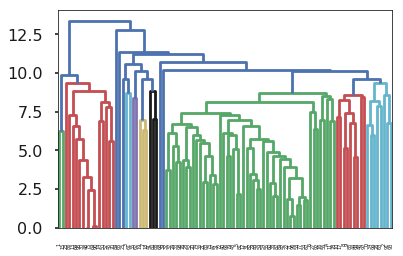

In [116]:
# Agglomerative clustering using scipy
Z = scipy.cluster.hierarchy.linkage(listV, method='average')
plt.clf()
fig = plt.figure()
dd = scipy.cluster.hierarchy.dendrogram(Z)
plt.savefig('{}.pdf'.format('average'))
plt.show()

# Use cophenetic correlation for evaluation 

In [117]:
c, coph_dists = scipy.cluster.hierarchy.cophenet(Z, pdist(listV))
print("c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c="+repr(c))

c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.83762182127852514


size = 8000;   c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.68441209386784496  
size = 5000;   c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.69580000510359319  
size = 3000;   c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.70658970892720374  
size = 2000;   c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.73391695357663456  
size = 1000;   c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.73100111995588535  
size = 500;    c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.73846506222107178  
size = 100;    c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.83762182127852514  
size = 50;     c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.87879134020736049  
size = 10;     c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.91836580287816971  
size = 3;      c, coph_dists = cophenet(Z, pdist(X)); c is ideally close to one, c=0.55192082653918684  

In [99]:
#agglomerative clustering using sklearn 
data1 = []
for k,v in nucrmap.items():
    data1.append(v)
np.save('123', np.array(data1))
data1 = np.load('123.npy')

In [100]:
# get number of clusters from above plot and generate clusters dictionary
model = cluster.AgglomerativeClustering(linkage='average', n_clusters=10)
result = model.fit_predict(Z)
clusters = {}
for i in range(len(result)):
    k = result[i]
    v = data1[i]
    clusters.setdefault(k, []).append(v)

In [101]:
# user index corresponding to user vector dictionary
index = random.randint(0,len(listK))

In [102]:
# Average Vector for each cluster generated above

average_vector = {}
for i in list(clusters.keys()):
    average_vector[i] = np.mean(clusters[i], axis=0)
    

In [103]:
# Get the users cluster vector 
user_vector = average_vector[result[index]]

In [104]:
# Perfor inner dot product between user_vector and each business vector

result_bcrmap = {}
for i in nbcrmap:
    result_bcrmap[i] = np.inner(user_vector, nbcrmap[i])

In [105]:
# Sort the business based on the minimum value of above operation. Keep top 20 businesses
top_business = sorted(result_bcrmap.items(), key=lambda x:(x[1]))[1:21]

In [106]:
# print out the recommended businesses

for k,v in top_business:
    print(business_name[k])

Dairy Queen,900 N Arizona Ave,Chandler,AZ
Tropical Smoothie,10670 Southern Highlands Pkwy, Ste 100,Las Vegas,NV
Domino's Pizza,1802 S New Hope Rd,Gastonia,NC
Domino's Pizza,703 S Gammon Rd,Madison,WI
Subway,2890 Las Vegas Blvd S,Las Vegas,NV
Krispy Krunchy Chicken,4105 E Mcdowell Rd,Phoenix,AZ
Pizza Hut,1165 Mentor Ave,Painesville,OH
Pizza Hut,10050 W Bell Rd, Ste 22,Sun City,AZ
Pizza Hut,3734 W T Harris Blvd,Charlotte,NC
Pizza Hut,3530 Mt Holly Hunterville Rd,Charlotte,NC
Pizza Hut,7002 Biddulph Rd,Brooklyn,OH
Pizza Hut,6557 Broadway Ave,Cleveland,OH
Pizza Hut,10616 Lorain Ave,Cleveland,OH
Pizza Hut,7941 Euclid Ave,Cleveland,OH
Pizza Hut,1112 Washington Pike,Bridgeville,PA
Pizza Hut,2324 Ardmore Blvd,Forest Hills,PA
Pizza Hut,9045 Airport Road,Brampton,ON
Pizza Pizza,1197 Ellesmere Road,Scarborough,ON
Pizza Hut,34165 Aurora Rd,Solon,OH
Pizza Hut,130 Davis Drive,Newmarket,ON
